In [483]:
import pandas as pd

file_path = 'tableDownload.csv'

df = pd.read_csv(file_path)

In [484]:
columns_to_remove =['Steam ID', 'Nemesis', 'Victim','(aprox.) Shortest life secs.','(aprox.) Longest life min.','Death by Weapons']
df.drop(columns=columns_to_remove,inplace=True)

In [485]:
allies_team_name='PV' #wpisz tag druzyny ktora grala po stronie axis
df_allies = df[df['Name'].str.contains(allies_team_name)]
df_axis = df[~df['Name'].str.contains(allies_team_name)]

In [486]:
df_allies_killers = df_allies[['Name','Kills','Deaths','K/D','Kill(s) / minute','Death(s) / minute']]
df_allies_killers=df_allies_killers.sort_values(by='Kills', ascending=False)


In [487]:
df_axis_killers = df_axis[['Name','Kills','Deaths','K/D','Kill(s) / minute','Death(s) / minute']]
df_axis_killers=df_axis_killers.sort_values(by='Kills', ascending=False)


C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\852655619.py:10: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig('table_allies_killers.pdf', bbox_inches='tight', pad_inches=0.5)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\852655619.py:10: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig('table_allies_killers.pdf', bbox_inches='tight', pad_inches=0.5)
C:\Users\barte\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


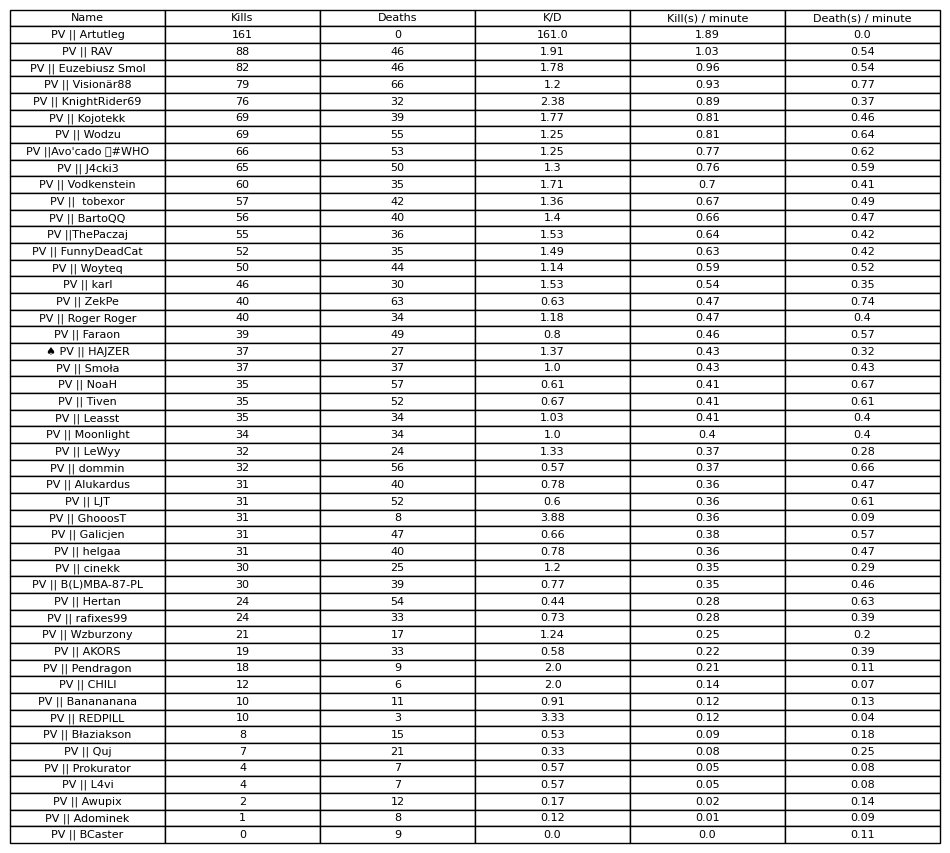

In [488]:
import tabulate as tb
import matplotlib.pyplot as plt
table = tb.tabulate(df_allies_killers,headers='keys', tablefmt='pretty', showindex=False)


fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.table(cellText=df_allies_killers.values, colLabels=df_allies_killers.columns, cellLoc = 'center', loc='center')

plt.savefig('table_allies_killers.pdf', bbox_inches='tight', pad_inches=0.5)

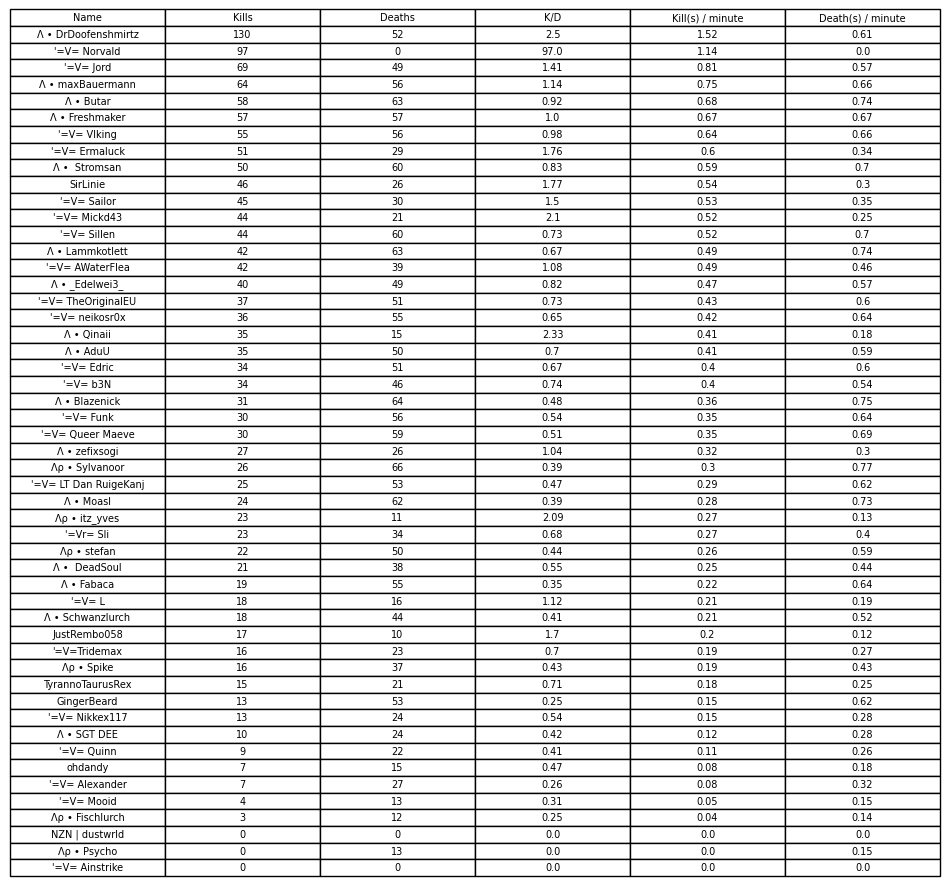

In [489]:
table = tb.tabulate(df_axis_killers,headers='keys', tablefmt='pretty', showindex=False)


fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')
ax.table(cellText=df_axis_killers.values, colLabels=df_axis_killers.columns, cellLoc = 'center', loc='center')

plt.savefig('table_axis_killers.pdf', bbox_inches='tight', pad_inches=0.5)

In [490]:
df_allies_combat = df_allies[['Name','Combat Effectiveness']]
df_allies_combat=df_allies_combat.sort_values(by='Combat Effectiveness', ascending=False)
df_allies_support = df_allies[['Name','Support Points']]
df_allies_support=df_allies_support.sort_values(by='Support Points', ascending=False)
df_allies_defense = df_allies[['Name','Defensive Points']]
df_allies_defense=df_allies_defense.sort_values(by='Defensive Points', ascending=False)
df_allies_offense = df_allies[['Name','Offensive Points']]
df_allies_offense=df_allies_offense.sort_values(by='Offensive Points', ascending=False)

df_axis_combat = df_axis[['Name','Combat Effectiveness']]
df_axis_combat=df_axis_combat.sort_values(by='Combat Effectiveness', ascending=False)
df_axis_support = df_axis[['Name','Support Points']]
df_axis_support=df_axis_support.sort_values(by='Support Points', ascending=False)
df_axis_defense = df_axis[['Name','Defensive Points']]
df_axis_defense=df_axis_defense.sort_values(by='Defensive Points', ascending=False)
df_axis_offense = df_axis[['Name','Offensive Points']]
df_axis_offense=df_axis_offense.sort_values(by='Offensive Points', ascending=False)




In [509]:
def create_dataframe(df,name):
    table = tb.tabulate(df,headers='keys', tablefmt='pretty', showindex=False)
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.axis('off')
    ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center')

    plt.savefig(f'{name}_table.pdf', bbox_inches='tight', pad_inches=0.5)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\2884675330.py:7: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(f'{name}_table.pdf', bbox_inches='tight', pad_inches=0.5)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\2884675330.py:7: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(f'{name}_table.pdf', bbox_inches='tight', pad_inches=0.5)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\2884675330.py:7: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(f'{name}_table.pdf', bbox_inches='tight', pad_inches=0.5)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\2884675330.py:7: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  plt.savefig(f'{name}_table.pdf', bbox_inches='tight', pad_inches=0.5)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\288467

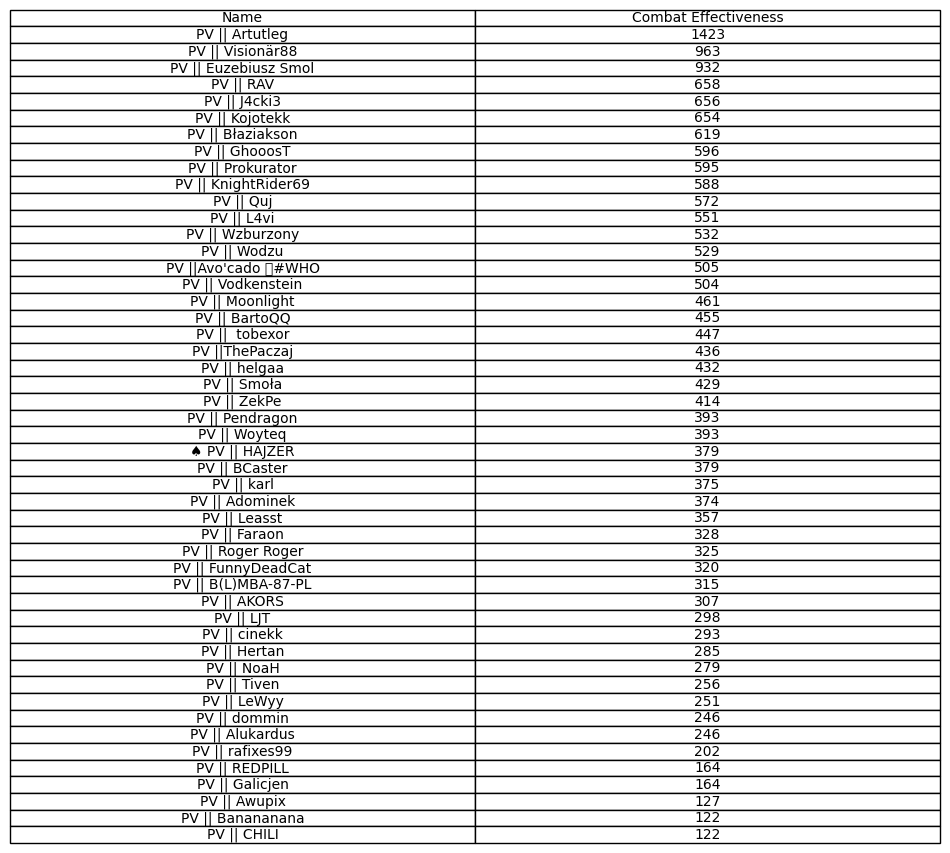

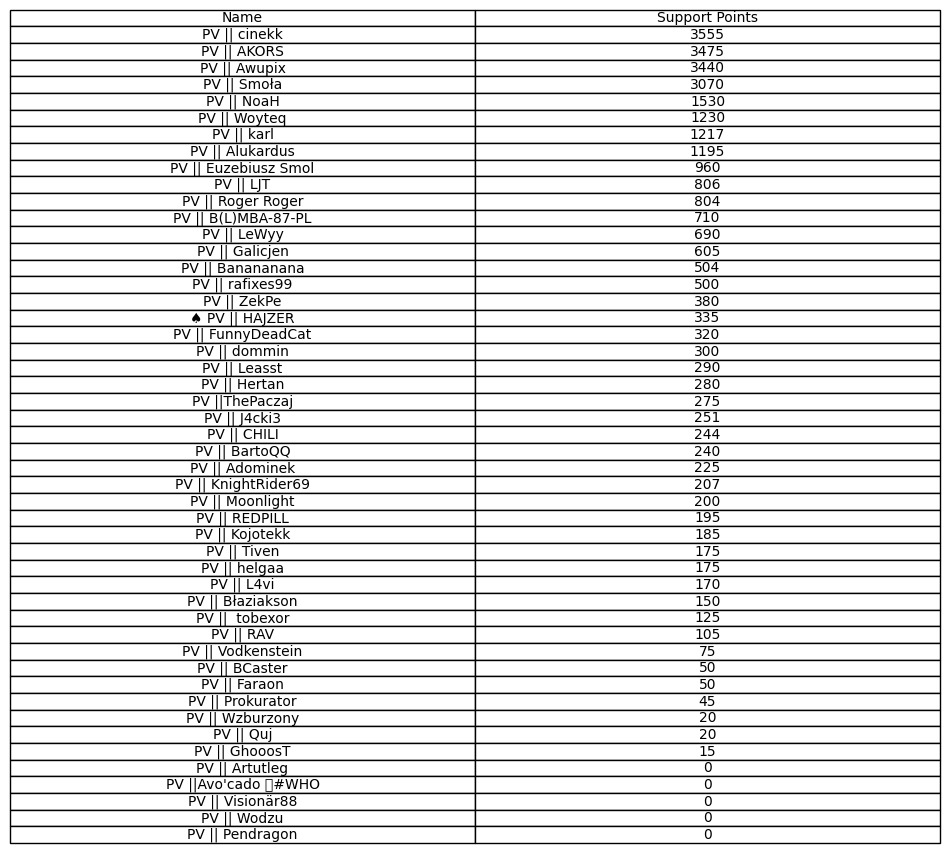

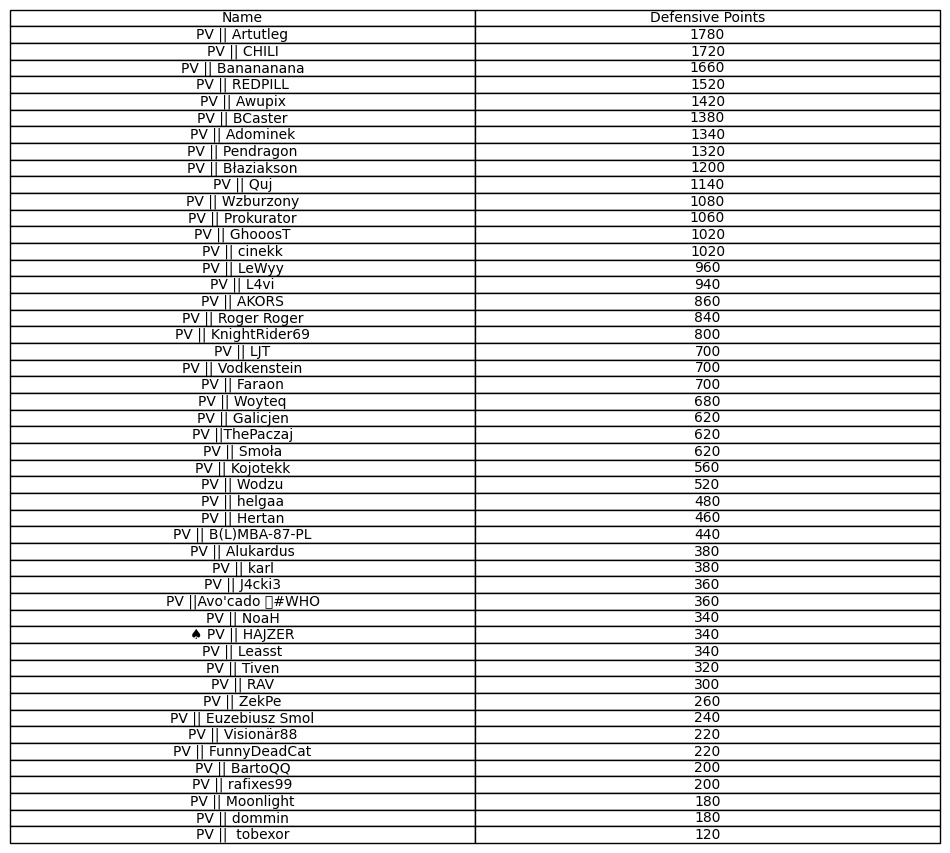

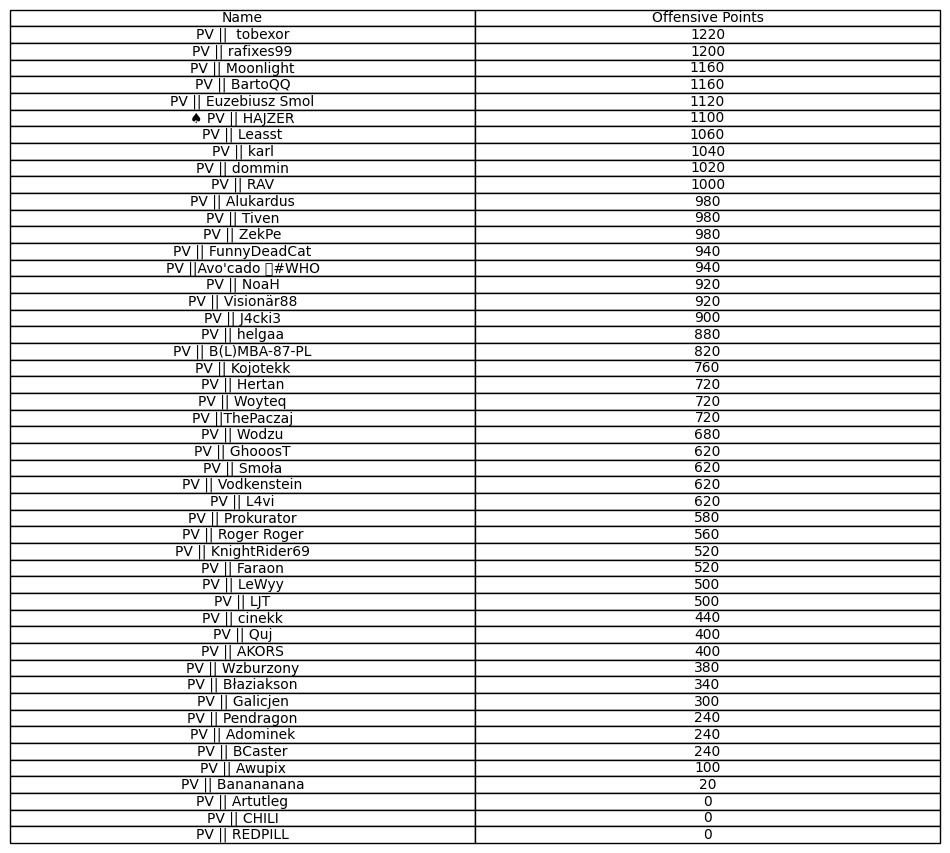

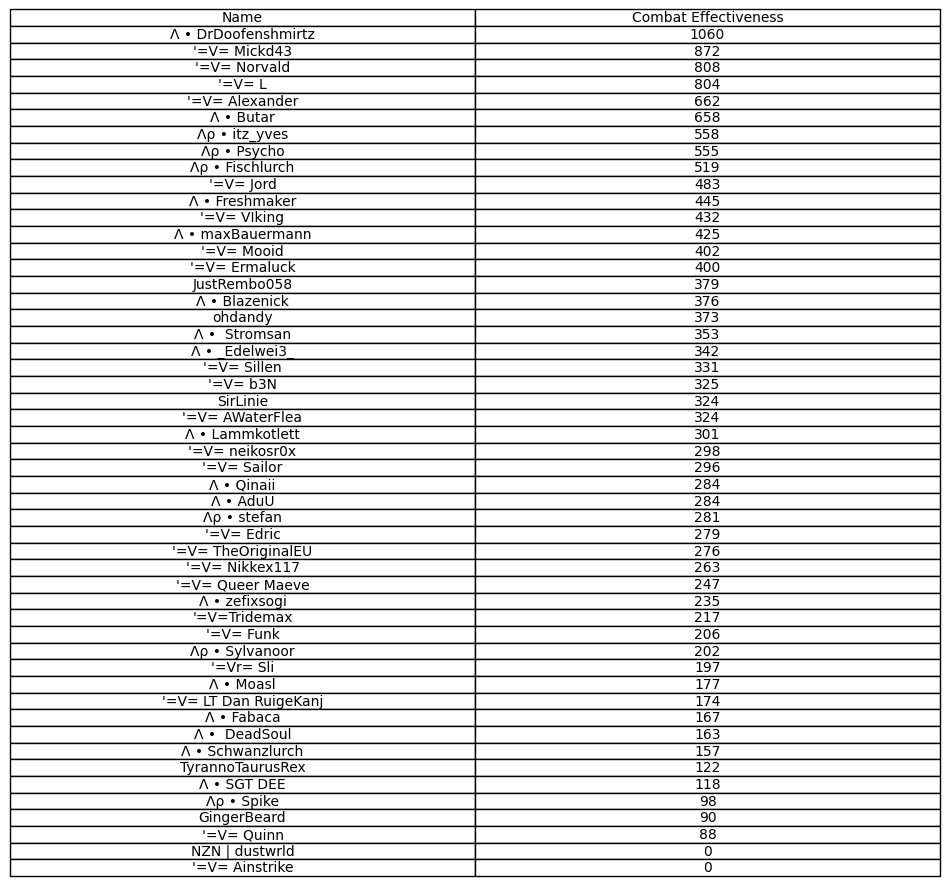

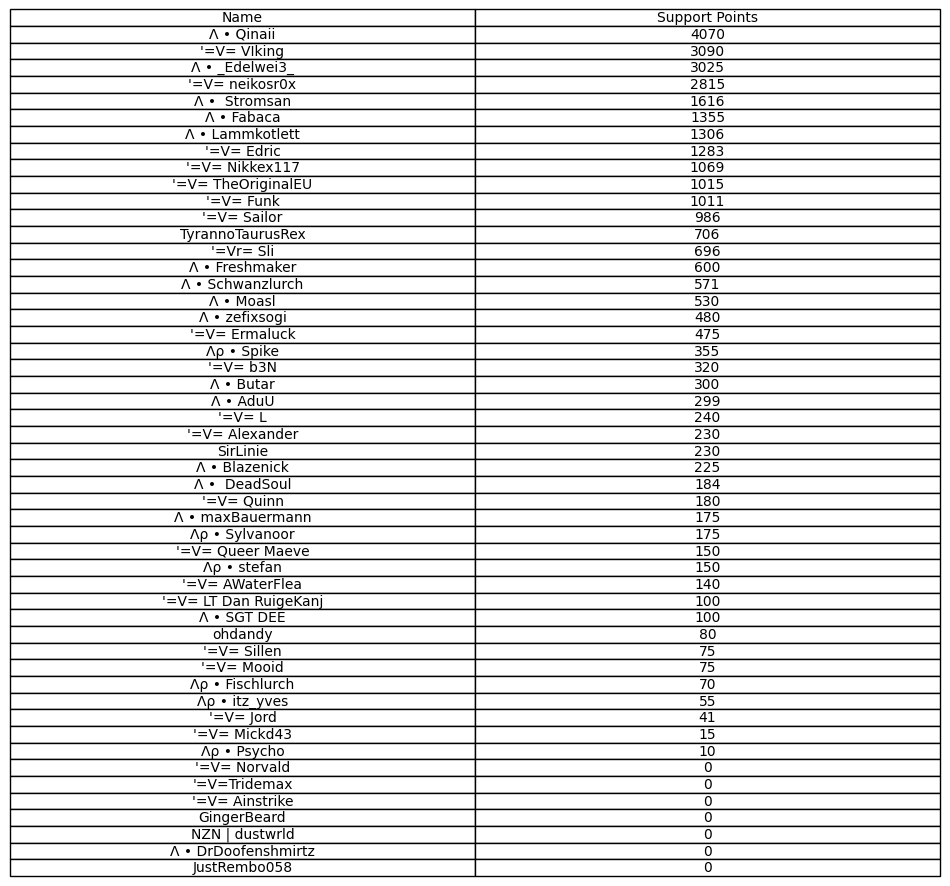

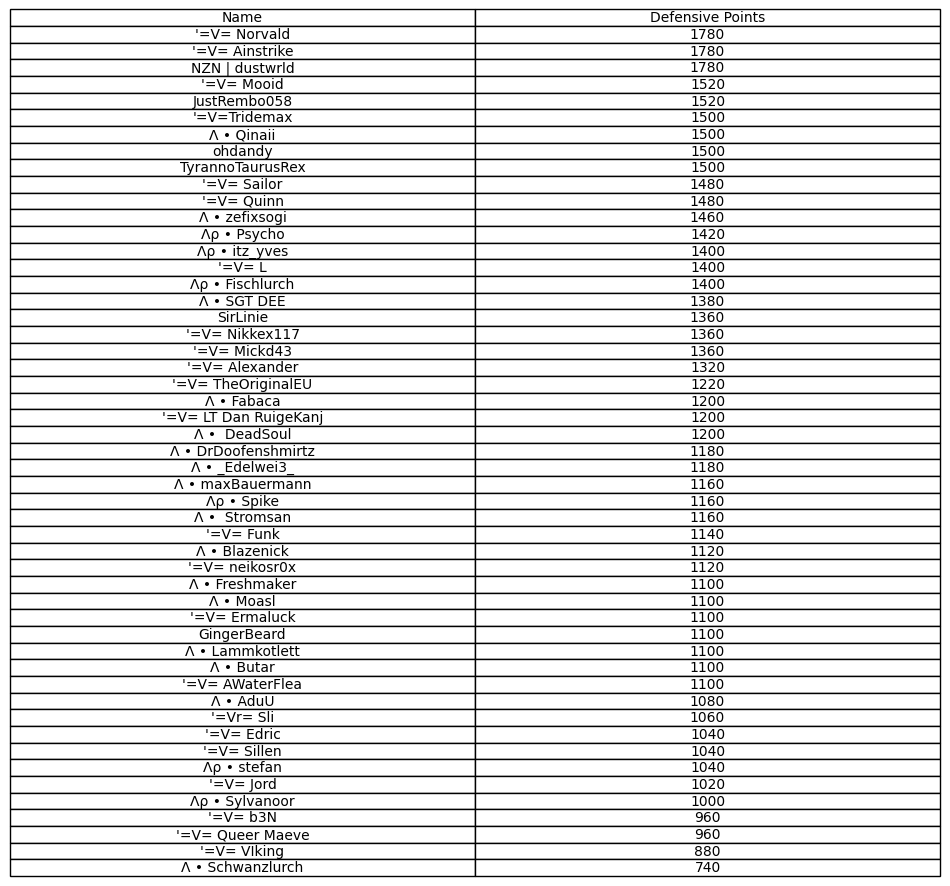

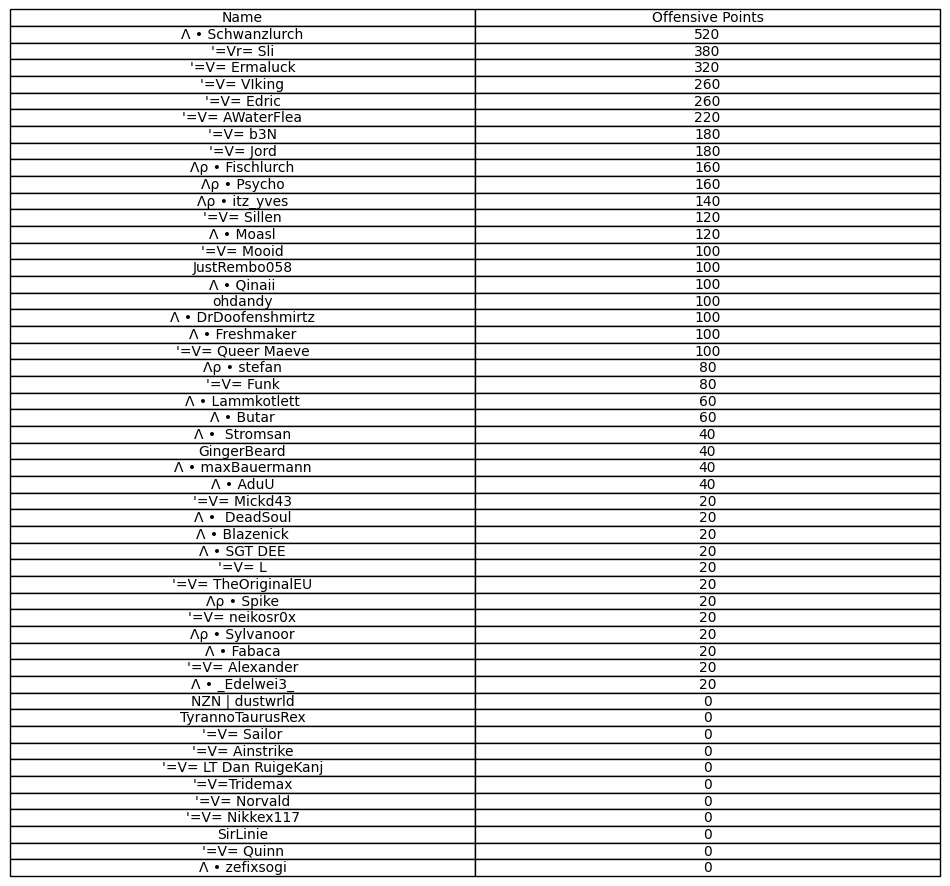

In [510]:
create_dataframe(df_allies_combat,'df_allies_combat')
create_dataframe(df_allies_support,'df_allies_support')
create_dataframe(df_allies_defense,'df_allies_defense')
create_dataframe(df_allies_offense,'df_allies_offense')
create_dataframe(df_axis_combat,'df_axis_combat')
create_dataframe(df_axis_support,'df_axis_support')
create_dataframe(df_axis_defense,'df_axis_defense')
create_dataframe(df_axis_offense,'df_axis_offense')

In [493]:
import ast
from pandas import json_normalize

df_weapons_allies = df_allies['Weapons'].apply(ast.literal_eval)

df_weapons_allies = json_normalize(df_weapons_allies)

weapons_allies_sum = df_weapons_allies.sum()

weapons_allies = weapons_allies_sum[weapons_allies_sum > 0]

weapons_allies_sum_sorted = weapons_allies_sum.sort_values(ascending=False)

In [494]:
df_weapons_axis = df_axis['Weapons'].apply(ast.literal_eval)

df_weapons_axis = json_normalize(df_weapons_axis)

weapons_axis_sum = df_weapons_axis.sum()

weapons_axis = weapons_axis_sum[weapons_axis_sum > 0]

weapons_axis_sum_sorted = weapons_axis_sum.sort_values(ascending=False)

In [495]:
weapon_categories = {
    'Infantry': ['M1 GARAND', 'M1918A2 BAR', 'BROWNING M1919', 'M1 CARBINE', 'M1A1 THOMPSON',
                 'MK2 GRENADE', 'M3 GREASE GUN', 'BAZOOKA', 'M2 AP MINE', 'SATCHEL', 'S-MINE',
                 'M97 TRENCH GUN', 'COLT M1911', '57MM CANNON [M1 57mm]','GEWEHR 43','STG44',
                 'MG42','MP40','KARABINER 98K','MG34','M43 STIELHANDGRANATE','PANZERSCHRECK','LUGER P08','75MM CANNON [PAK 40]',
                 'FELDSPATEN','GMC CCKW 353 (Transport)','M3 KNIFE','M1918A2 BAR','Unkown'],
    'Artillery': ['155MM HOWITZER [M114]','150MM HOWITZER [sFH 18]'],
    'Sniper': ['M1903 SPRINGFIELD','KARABINER 98K x8','FG42 x4'],
    'Tank': ['COAXIAL MG34 [Sd.Kfz.181 Tiger 1]','76MM M1 GUN [Sherman M4A3E2(76)]', 'COAXIAL M1919 [Sherman M4A3E2(76)]',
             '37MM CANNON [Stuart M5A1]', '75MM CANNON [Sherman M4A3(75)W]','HULL M1919 [Stuart M5A1]','COAXIAL M1919 [Sherman M4A3(75)W]'
             'HULL M1919 [Sherman M4A3E2(76)]', 'COAXIAL M1919 [Stuart M5A1]','75MM CANNON [Sd.Kfz.161 Panzer IV]','COAXIAL MG34 [Sd.Kfz.121 Luchs]',
             '50mm KwK 39/1 [Sd.Kfz.234 Puma]','COAXIAL MG34 [Sd.Kfz.181 Tiger 1]','20MM KWK 30 [Sd.Kfz.121 Luchs]',
             '88 KWK 36 L/56 [Sd.Kfz.181 Tiger 1]','COAXIAL MG34 [Sd.Kfz.161 Panzer IV]','HULL MG34 [Sd.Kfz.161 Panzer IV]','Sd.Kfz.161 Panzer IV','HULL MG34 [Sd.Kfz.181 Tiger 1]'],
    'Commander' : ['STRAFING RUN','BOMBING RUN']
}


In [496]:

categorized_weapons_allies = {}
category_totals_allies = {}
for category, weapons_list in weapon_categories.items():
    categorized_weapons_allies[category] = weapons_allies_sum_sorted[weapons_allies_sum_sorted.index.isin(weapons_list)]
    category_totals_allies[category] = categorized_weapons_allies[category].sum()

categorized_weapons_axis = {}
category_totals_axis = {}
for category, weapons_list in weapon_categories.items():
    categorized_weapons_axis[category] = weapons_axis_sum_sorted[weapons_axis_sum_sorted.index.isin(weapons_list)]
    category_totals_axis[category] = categorized_weapons_axis[category].sum()

# for category, weapons in categorized_weapons_axis.items():
#     print(f"\nCategory: {category}")
#     print(weapons)
#     print(f"Total {category} : {category_totals_axis[category]}")

df_categorized_weapons_allies = pd.DataFrame(categorized_weapons_allies)
infantry_df_allies = df_categorized_weapons_allies[df_categorized_weapons_allies['Infantry'] > 0]
artillery_df_allies = df_categorized_weapons_allies[df_categorized_weapons_allies['Artillery'] > 0]
sniper_df_allies = df_categorized_weapons_allies[df_categorized_weapons_allies['Sniper'] > 0]
tank_df_allies = df_categorized_weapons_allies[df_categorized_weapons_allies['Tank'] > 0]
commander_df_allies = df_categorized_weapons_allies[df_categorized_weapons_allies['Commander'] > 0]
                                   
infantry_df_allies.drop(columns =['Artillery','Sniper','Tank','Commander'],inplace=True)
artillery_df_allies.drop(columns =['Infantry','Sniper','Tank','Commander'],inplace=True)
sniper_df_allies.drop(columns =['Artillery','Infantry','Tank','Commander'],inplace=True)
tank_df_allies.drop(columns =['Artillery','Sniper','Infantry','Commander'],inplace=True)
commander_df_allies.drop(columns =['Artillery','Sniper','Infantry','Tank'],inplace=True)
    
df_categorized_weapons_axis = pd.DataFrame(categorized_weapons_axis)
infantry_df_axis = df_categorized_weapons_axis[df_categorized_weapons_axis['Infantry'] > 0]
artillery_df_axis = df_categorized_weapons_axis[df_categorized_weapons_axis['Artillery'] > 0]
sniper_df_axis = df_categorized_weapons_axis[df_categorized_weapons_axis['Sniper'] > 0]
tank_df_axis = df_categorized_weapons_axis[df_categorized_weapons_axis['Tank'] > 0]
commander_df_axis = df_categorized_weapons_axis[df_categorized_weapons_axis['Commander'] > 0]

infantry_df_axis.drop(columns =['Artillery','Sniper','Tank','Commander'],inplace=True)
artillery_df_axis.drop(columns =['Infantry','Sniper','Tank','Commander'],inplace=True)
sniper_df_axis.drop(columns =['Artillery','Infantry','Tank','Commander'],inplace=True)
tank_df_axis.drop(columns =['Artillery','Sniper','Infantry','Commander'],inplace=True)
commander_df_axis.drop(columns =['Artillery','Sniper','Infantry','Tank'],inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\3734877166.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infantry_df_allies.drop(columns =['Artillery','Sniper','Tank','Commander'],inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\3734877166.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artillery_df_allies.drop(columns =['Infantry','Sniper','Tank','Commander'],inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\3734877166.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cave

In [497]:
infantry_df_allies=infantry_df_allies.sort_values(by='Infantry', ascending =False)
artillery_df_allies=artillery_df_allies.sort_values(by='Artillery', ascending =False)
sniper_df_allies=sniper_df_allies.sort_values(by='Sniper', ascending =False)
tank_df_allies=tank_df_allies.sort_values(by='Tank', ascending =False)
commander_df_allies=commander_df_allies.sort_values(by='Commander', ascending =False)

infantry_df_axis=infantry_df_axis.sort_values(by='Infantry', ascending =False)
artillery_df_axis=artillery_df_axis.sort_values(by='Artillery', ascending =False)
sniper_df_axis=sniper_df_axis.sort_values(by='Sniper', ascending =False)
tank_df_axis=tank_df_axis.sort_values(by='Tank', ascending =False)
commander_df_axis=commander_df_axis.sort_values(by='Commander', ascending =False)

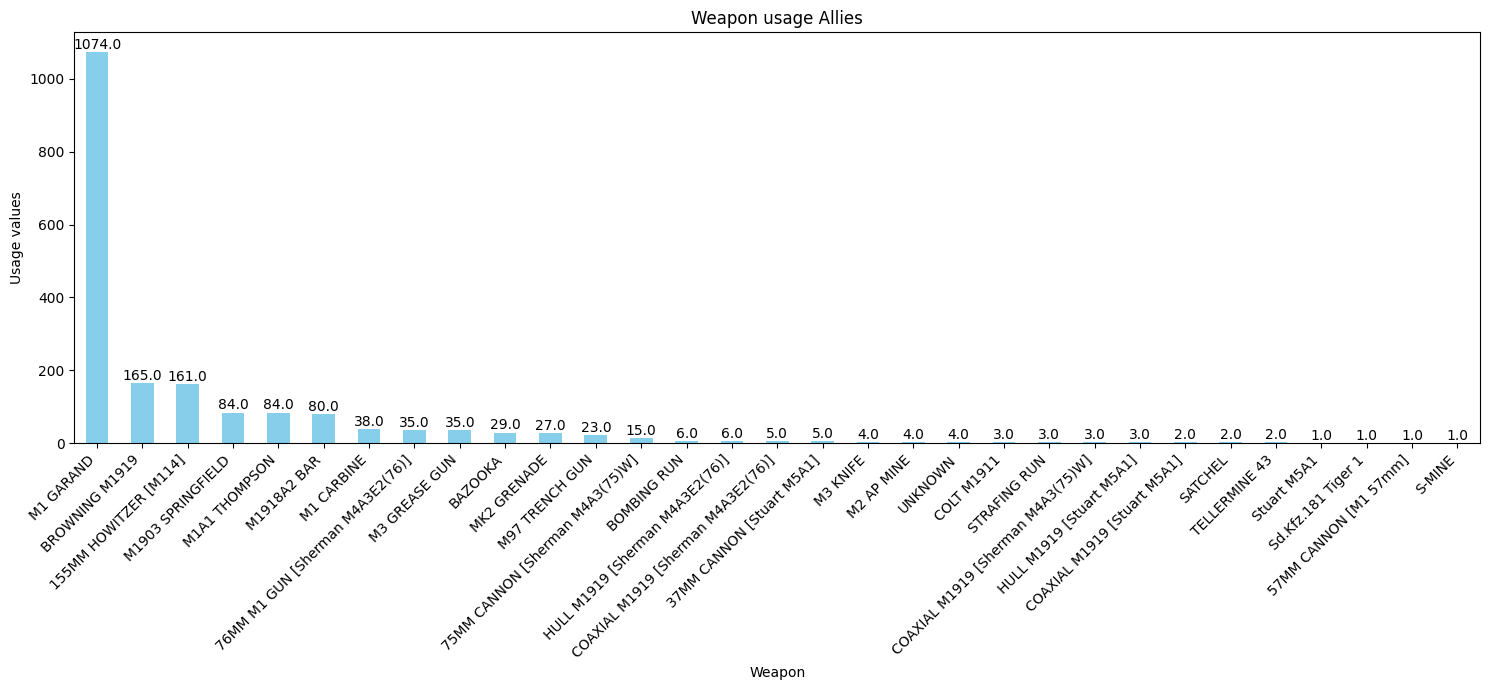

In [498]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
ax = weapons_allies_sum_sorted.plot(kind='bar', color='skyblue')
plt.title('Weapon usage Allies')
plt.xlabel('Weapon')
plt.ylabel('Usage values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with its corresponding value
for i, v in enumerate(weapons_allies_sum_sorted):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('weapons_plot_allies.pdf')

# Show the plot
plt.show()

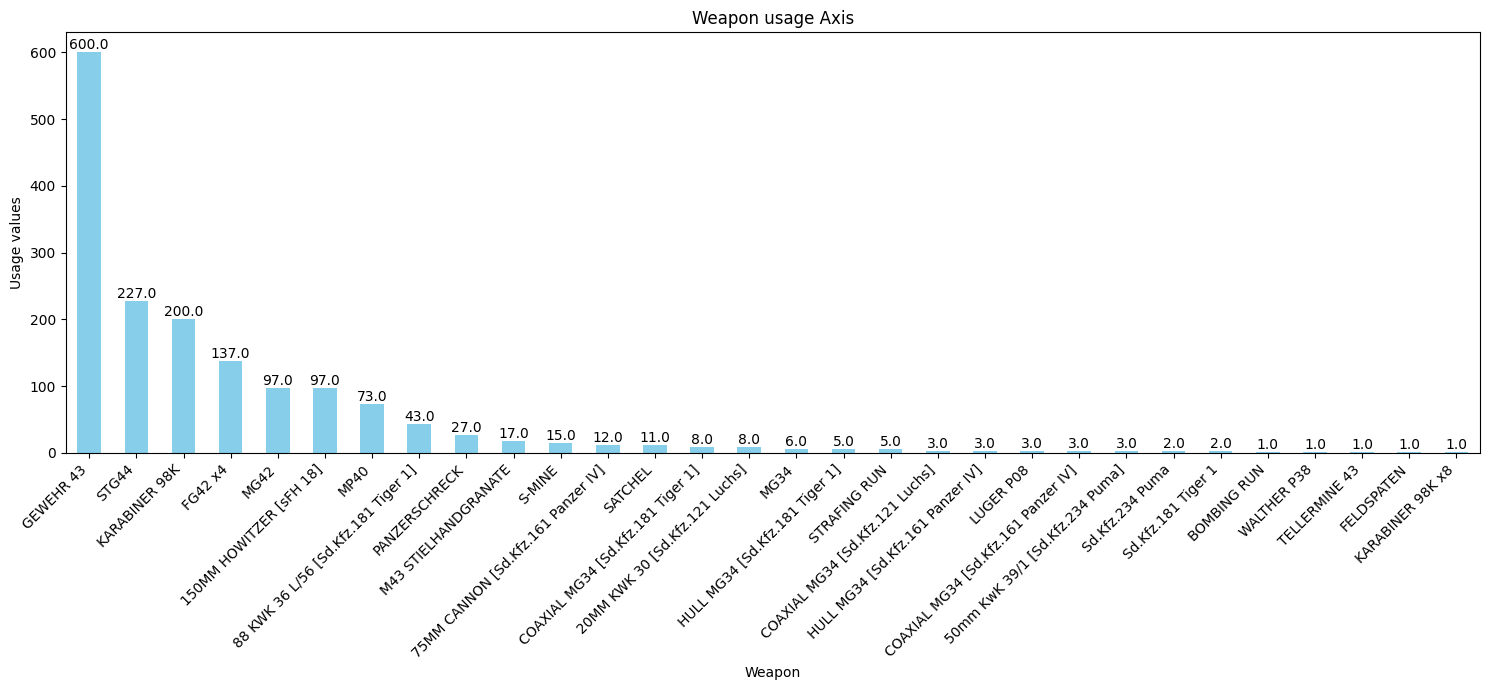

In [499]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 7))
ax = weapons_axis_sum_sorted.plot(kind='bar', color='skyblue')
plt.title('Weapon usage Axis')
plt.xlabel('Weapon')
plt.ylabel('Usage values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Annotate each bar with its corresponding value
for i, v in enumerate(weapons_axis_sum_sorted):
    ax.text(i, v + 0.1, str(v), color='black', ha='center', va='bottom')

plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('weapons_plot_axis.pdf')

# Show the plot
plt.show()

In [500]:
allies_infantry_value_sum=int(infantry_df_allies['Infantry'].sum())
allies_sniper_value_sum=int(sniper_df_allies['Sniper'].sum())
allies_tank_value_sum=int(tank_df_allies['Tank'].sum())
allies_artillery_value_sum=int(artillery_df_allies['Artillery'].sum())
allies_commander_value_sum=int(commander_df_allies['Commander'].sum())

axis_infantry_value_sum=int(infantry_df_axis['Infantry'].sum())
axis_sniper_value_sum=int(sniper_df_axis['Sniper'].sum())
axis_tank_value_sum=int(tank_df_axis['Tank'].sum())
axis_artillery_value_sum=int(artillery_df_axis['Artillery'].sum())
axis_commander_value_sum=int(commander_df_axis['Commander'].sum())

allies_total=allies_infantry_value_sum+allies_sniper_value_sum+allies_tank_value_sum+allies_artillery_value_sum+allies_commander_value_sum
axis_total=axis_infantry_value_sum+axis_sniper_value_sum+axis_tank_value_sum+axis_artillery_value_sum+axis_commander_value_sum
total=allies_total+axis_total

total_inf=allies_infantry_value_sum+axis_infantry_value_sum
total_sniper=allies_sniper_value_sum+axis_sniper_value_sum
total_tank=allies_tank_value_sum+axis_tank_value_sum
total_arty=allies_artillery_value_sum+axis_artillery_value_sum
total_commander=allies_commander_value_sum+axis_commander_value_sum

table_data_total_weapon_usage = (
    ('Artillery',allies_artillery_value_sum,axis_artillery_value_sum,total_arty),
    ('Infantry',allies_infantry_value_sum,axis_infantry_value_sum,total_inf),
    ('Sniper',allies_sniper_value_sum,axis_sniper_value_sum,total_sniper),
    ('Tank',allies_tank_value_sum,axis_tank_value_sum,total_tank),
    ('Commander',allies_commander_value_sum,axis_commander_value_sum,total_commander),
    ('Total',allies_total,axis_total,total)
)


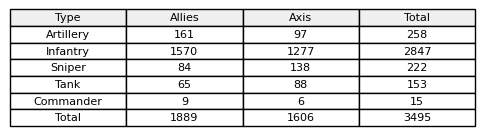

In [501]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 1))
ax.axis('off')

col_labels_weapon_usage = ['Type','Allies','Axis','Total']

table = ax.table(cellText=table_data_total_weapon_usage, cellLoc='center',colLabels=col_labels_weapon_usage, loc='center',
                 colColours=['#f0f0f0']*len(col_labels_weapon_usage))
table.auto_set_font_size(False)
table.set_fontsize(8)

plt.savefig('table_weapon_usage.pdf', bbox_inches='tight', pad_inches=0.5)

plt.show()

In [502]:
df_weapon_usage=pd.DataFrame(table_data_total_weapon_usage)
df_weapon_usage.columns = ['Type', 'Allies', 'Axis', 'Total']

df_weapon_usage

artillery_row = df_weapon_usage[df_weapon_usage['Type'] == 'Artillery']
infantry_row = df_weapon_usage[df_weapon_usage['Type'] == 'Infantry']
sniper_row = df_weapon_usage[df_weapon_usage['Type'] == 'Sniper']
tank_row = df_weapon_usage[df_weapon_usage['Type'] == 'Tank']
commander_row = df_weapon_usage[df_weapon_usage['Type'] == 'Commander']

artillery_row.drop(columns='Total', inplace=True)
infantry_row.drop(columns='Total', inplace=True)
sniper_row.drop(columns='Total', inplace=True)
tank_row.drop(columns='Total', inplace=True)
commander_row.drop(columns='Total', inplace=True)

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\3685076593.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artillery_row.drop(columns='Total', inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\3685076593.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  infantry_row.drop(columns='Total', inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_20744\3685076593.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

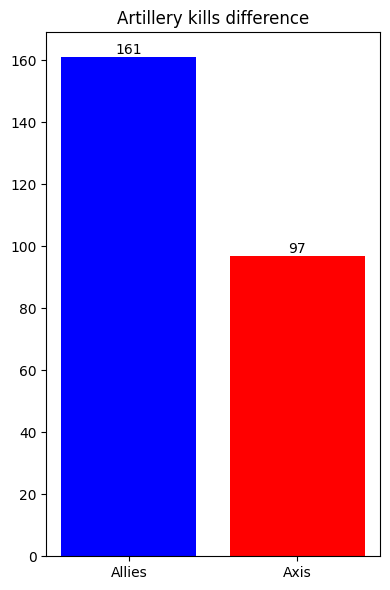

In [503]:
import numpy as np

fig, ax = plt.subplots(figsize=(4, 6))

xbar = np.array(['Allies', 'Axis'])
ybar = np.array([artillery_row['Allies'].values[0], artillery_row['Axis'].values[0]])

colors = ['blue', 'red']

# Use the color parameter to set bar colors
bars = ax.bar(xbar, ybar, color=colors)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Customize plot appearance
ax.set_title('Artillery kills difference')
ax.set_xticks(xbar)
ax.set_xticklabels(xbar)


plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('artillery_plot.pdf')

# Show the plot
plt.show()

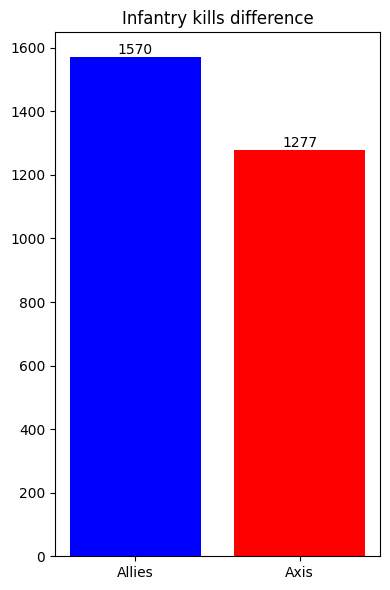

In [504]:
fig, ax = plt.subplots(figsize=(4, 6))

xbar = np.array(['Allies', 'Axis'])
ybar = np.array([infantry_row['Allies'].values[0], infantry_row['Axis'].values[0]])

colors = ['blue', 'red']

# Use the color parameter to set bar colors
bars = ax.bar(xbar, ybar, color=colors)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Customize plot appearance
ax.set_title('Infantry kills difference')
ax.set_xticks(xbar)
ax.set_xticklabels(xbar)


plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('infantry_plot.pdf')

# Show the plot
plt.show()

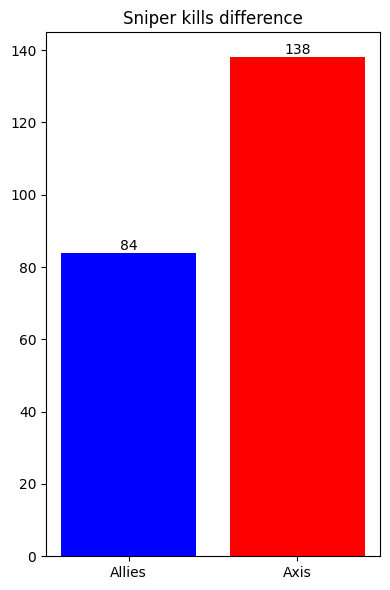

In [505]:
fig, ax = plt.subplots(figsize=(4, 6))

xbar = np.array(['Allies', 'Axis'])
ybar = np.array([sniper_row['Allies'].values[0], sniper_row['Axis'].values[0]])

colors = ['blue', 'red']

# Use the color parameter to set bar colors
bars = ax.bar(xbar, ybar, color=colors)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Customize plot appearance
ax.set_title('Sniper kills difference')
ax.set_xticks(xbar)
ax.set_xticklabels(xbar)


plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('sniper_plot.pdf')

# Show the plot
plt.show()

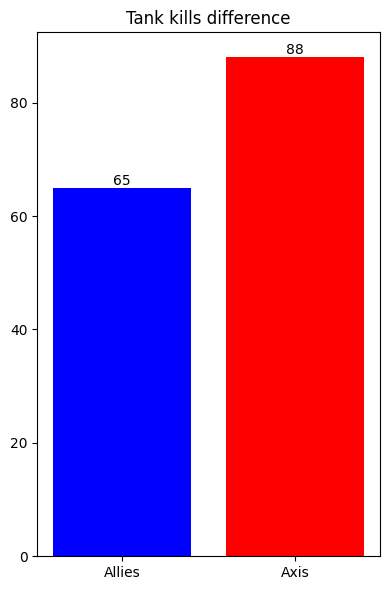

In [506]:
fig, ax = plt.subplots(figsize=(4, 6))

xbar = np.array(['Allies', 'Axis'])
ybar = np.array([tank_row['Allies'].values[0], tank_row['Axis'].values[0]])

colors = ['blue', 'red']

# Use the color parameter to set bar colors
bars = ax.bar(xbar, ybar, color=colors)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Customize plot appearance
ax.set_title('Tank kills difference')
ax.set_xticks(xbar)
ax.set_xticklabels(xbar)


plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('tank_plot.pdf')

# Show the plot
plt.show()

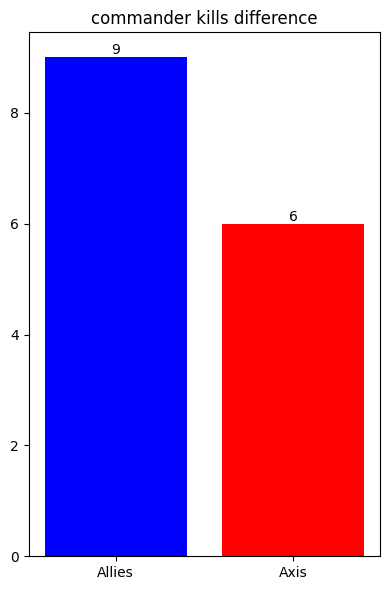

In [507]:
fig, ax = plt.subplots(figsize=(4, 6))

xbar = np.array(['Allies', 'Axis'])
ybar = np.array([commander_row['Allies'].values[0], commander_row['Axis'].values[0]])

colors = ['blue', 'red']

# Use the color parameter to set bar colors
bars = ax.bar(xbar, ybar, color=colors)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Customize plot appearance
ax.set_title('commander kills difference')
ax.set_xticks(xbar)
ax.set_xticklabels(xbar)


plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('commander_plot.pdf')

# Show the plot
plt.show()